# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [25,276,401]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
print "Chosen samples of wholesale customers dataset minus dataset mean:"
display(samples - np.round(data.mean()))
print "Chosen samples of wholesale customers dataset minus dataset median:"
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16165,4230,7595,201,4003,57
1,27901,3749,6964,4479,603,2503
2,27167,2801,2128,13223,92,1902


Chosen samples of wholesale customers dataset minus dataset mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4165.0,-1566.0,-356.0,-2871.0,1122.0,-1468.0
1,15901.0,-2047.0,-987.0,1407.0,-2278.0,978.0
2,15167.0,-2995.0,-5823.0,10151.0,-2789.0,377.0


Chosen samples of wholesale customers dataset minus dataset median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7661.0,603.0,2839.0,-1325.0,3187.0,-909.0
1,19397.0,122.0,2208.0,2953.0,-213.0,1537.0
2,18663.0,-826.0,-2628.0,11697.0,-724.0,936.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first customer (0 - indices #25) could be a restaurant/hotel/bed & breakfast.  I chose this type of establishment because their largest purchase product is *Fresh*, followed by *Grocery* items.  I took this as making freshly prepared meals for the customers everyday.  The *Detergent_Paper* is significantly higher than the other two places because I think they need cleaning supplies, paper napkins, and towels for tables, bathrooms, windows, kitchen.  The *Detergents_Paper* would be very high for cleaning linens and towels from each bedroom.  Some of the *paper* costs could be for flyers and menus.  *Delicatessen* is low because the restaurant is making its own meats and bread with *Fresh* and *Grocery*.  The hotel and B&B are chosen as the type of establishment because the *Detergents_Paper* is significantly higher than the other two samples as well as the mean value for customers (mean = 2881).  This value is in the 75 percentile for spending in this feature.  The *Fresh* is a good bit higher than the mean, but not the magnitude of *Detergents_Paper*.  

I took the second customer (1 - indices #276) as a coffee shop/cafe.  More fresh food than the restaurant/hotel/b&b because people come in and leave very quickly after they get their coffee and *Fresh* food or *Delicatessen*  good.  The *Fresh* and *Deicatessen* features are both roughly double the mean values.  Cleaning is significantly lower than restaurant/hotel/b&b because there is no kitchen and bedrooms (etc.).  *Delicatessen* purchases are the highest here.  Maybe this means buying meats for quick and easy sandwiches.

The third customer (2 - indices #401) I took as a sandwich shop / convenience grocery store.  Lots of *Frozen* foods for purchase to go along with all the *Fresh* foods.  Both *Frozen* and *Fresh* are significnatly higher than there feature mean value.  They don't have a significant amount for groceries and they do not have a public restroom.  There is a restaurant in New Orleans called Stein's Deli.  It is know for its Reuben sandwiches.  I reference them because there are very few tables in the store; it is made to pick-up and leave.  Every wall of the store has freezers / refrigarators filled with beer as well as common NY food products.  They don't expect you to stay there so the *Detergents_Paper* is low, but the *Fresh* & *Frozen* high.  *Delicatessen* is also high for the sandwich meats.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
for feature in data.columns:
    new_data1 = data.drop(feature,axis = 1)
    feature1 = data[feature]

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data1, feature1, test_size=0.25, random_state=2)

    # Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor1 = DecisionTreeRegressor(random_state=2)
    regressor1.fit(X_train,y_train)

    # Report the score of the prediction using the testing set
    score1 = regressor1.score(X_test,y_test)
    print feature,score1

Fresh -0.500889898435
Milk -0.152331262727
Grocery 0.514349780217
Frozen -5.12627908664
Detergents_Paper 0.5370246003
Delicatessen -2.18131176357


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
* Fresh = **-0.500889898435**
* Milk = **-0.152331262727**
* Grocery = **0.514349780217**
* Frozen = **-5.12627908664**
* Detergents_Paper = **0.5370246003**
* Delicatessen = **-2.18131176357**

Above is a list of all the features removed and how the feature would be predicted.

My original R^2 score was run for *Delicatessen*.  It had a negative value which means the model failed to fit the data.

We have 6 features and are dropping one feature to see if we can predict it with the other 5 features.  If the R^2 value is high, that means we can reconstruct most of the information provided by the feature by using the remaining 5 other features that are not dropped.

If the do the same process and find the R^2 value is low, that means we will not be very successful if we try to predict what that feature might have been.

Therefore, we want to be able to predict the customers specific behaviors.  If we remove a specific feature that has a negative R^2 value, we lose all the information that feature provided. So all the features that have a negative score: *Fresh*, *Milk*, *Frozen*,  *Delicatessen* are very important because we want to know the customers spending habits. If we cannot predict them, then we need that feature in our analysis.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

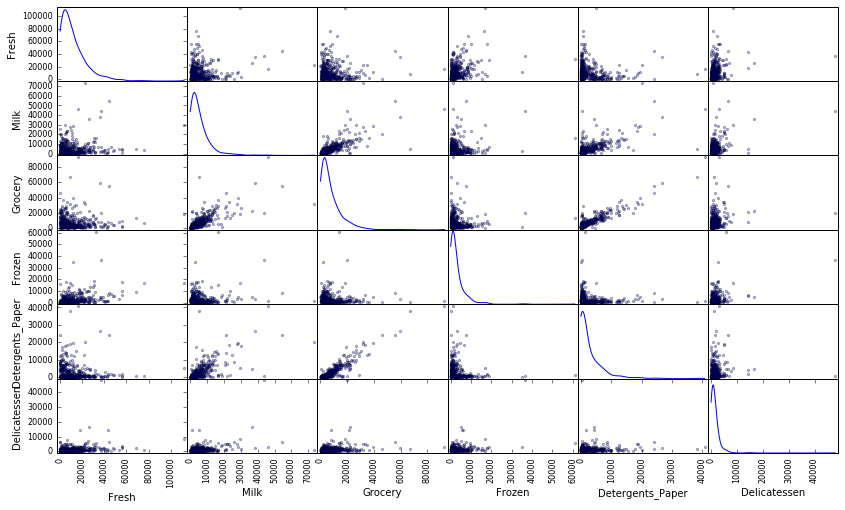

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
For the most part, I cannot see any correlation in the data above.  This is probably why I received a negative value on my R^2 score (and a *0.53* score - reasoning below).  

However, there is somewhat of a linear relationship between the *Grocery* group and the *Detergents_Paper* group.  There might also be a coorelation between the *Detergents_Paper* group and *Milk*; although it doesn't look very strong (see question #2, because I re-ran the code based on this finding).  It also appears that *Grocery* and *Milk* have a correlations.  This is much more obvious below in the heatmap.

The curves look more like a skewed normal (or log-normal) distribution than a standard normal distribution; meaning, the curves are skewed to one side.  In the cases above, the curves are skewed towards the ordinate (vertical) axis.  As expected from the distribution curves, the majority of the data is located in a cluster near the origin (in the positive axes).

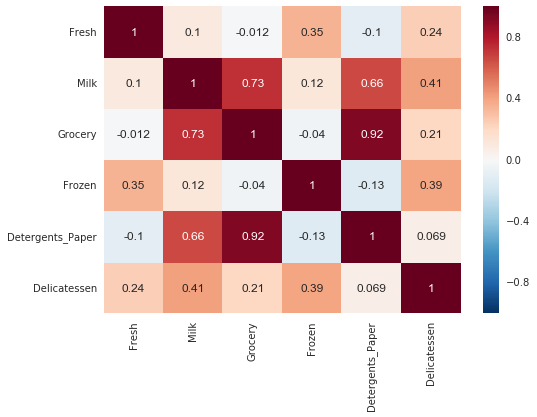

In [6]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

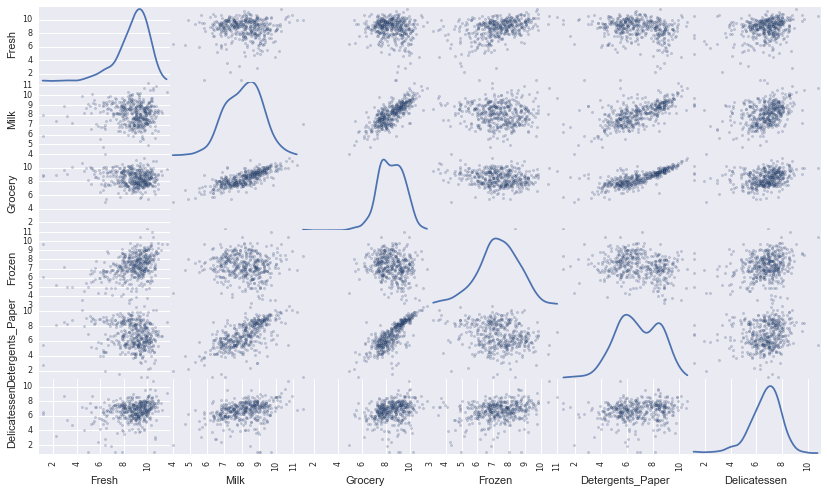

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
print "Chosen samples of wholesale customers dataset (with log-scaling):"
display(log_samples)

Chosen samples of wholesale customers dataset (with log-scaling):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
1,10.236418,8.229244,8.848509,8.407155,6.401917,7.825245
2,10.209758,7.937732,7.662938,9.489713,4.521789,7.550661


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    #Print the Percentile for Outliers
    print "Outlier Fence for the feature '{}':".format(feature)
    print "Lower Outlier Fence =", Q1-step
    print "Upper Outlier Fence =", Q3+step
    print "----------------------------------------------------------------------"
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]
print "Outliers removed =", outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Outlier Fence for the feature 'Fresh':
Lower Outlier Fence = 5.51455083361
Upper Outlier Fence = 12.2705718166
----------------------------------------------------------------------
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier Fence for the feature 'Milk':
Lower Outlier Fence = 5.01673296722
Upper Outlier Fence = 11.1987283614
----------------------------------------------------------------------
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier Fence for the feature 'Grocery':
Lower Outlier Fence = 5.27575998758
Upper Outlier Fence = 11.672709891
----------------------------------------------------------------------
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier Fence for the feature 'Frozen':
Lower Outlier Fence = 4.26035024816
Upper Outlier Fence = 10.5252235842
----------------------------------------------------------------------
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier Fence for the feature 'Detergents_Paper':
Lower Outlier Fence = 1.45874266385
Upper Outlier Fence = 12.3636993597
----------------------------------------------------------------------
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier Fence for the feature 'Delicatessen':
Lower Outlier Fence = 3.76959400251
Upper Outlier Fence = 9.74900908097
----------------------------------------------------------------------
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers removed = [65, 66, 75, 128, 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
There are 5 data points that are outliers in at least two features.  The points (indices) are: 65, 66, 75, 128, 154.

I currently have 440 samples. If I remove all 5, I lose exactly 1.14% of the samples.  I am comfortable removing these samples from the dataset because it is such as small amount. 

Outliers can provide valuable information, as seen in the ENRON examples.  However, as our problem statement says, this analysis "would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer."   I want to concentrate on the normal customers instead of the outliers.  

I added another heatmap for visualizing the outliers.

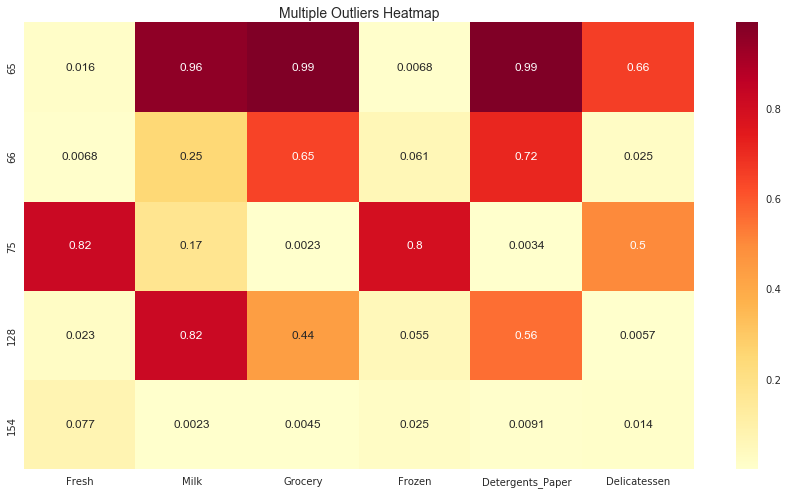

In [10]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
percentiles = log_data.rank(pct=True)
percentiles = percentiles.iloc[outliers]
plt.rcParams['figure.figsize']=(15, 8)
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, cmap="YlOrRd", annot=True)
display(heat)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

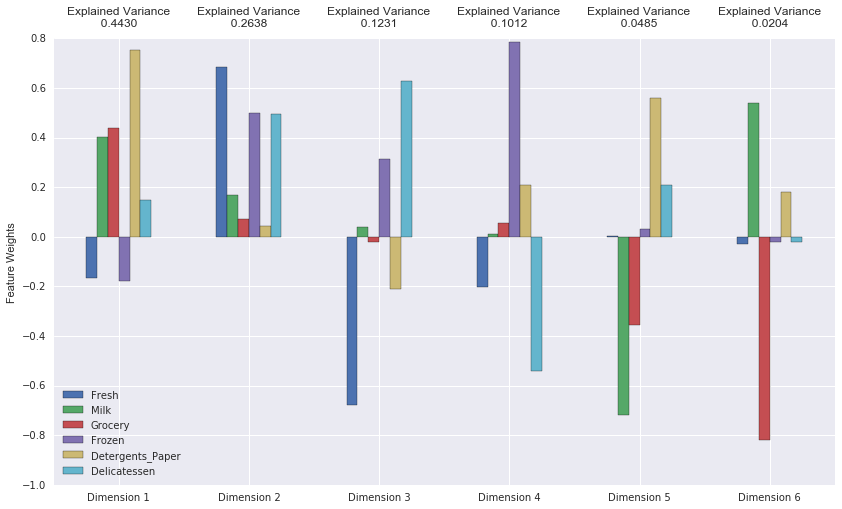

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
n_comp = min(len(log_data.keys()),len(data)) # I know the problem statement specifically says use 6 dimensions, but I wanted to
                                             # the code up like the sklearn documentation.
pca = PCA(n_components=n_comp)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The sum of all the dimensions is equal to 1, which should represent 100% of the data.  Therefore, the first and second principal components explain **0.7068** (0.4430 + 0.2638) or **70.68%** of the data.  The first four components explain **0.9311** or **93.11%** of the data.

As we learned in class, the principal component of the dataset is in the direction that has the largest variance because this will retain the maximum amount of *information* from the data.  As stated in forum discussions, "high weights indicate that the variance of the specific product correlate with a specific dimension and obviously with the other products that have high weight. Low weight indicate low or no correlation."

Per visual inspection, the first dimension shows maximum variance in the *Detergent_Paper*.  Therefore, our first principal component will be in that direction with *Grocery* the second principal component in the orthogonal direction.  This matches my assumption in Question 3.

The second dimension shows the largest variance in the *Fresh* group and it has a good correlation to the *Delicatessen* and *Frozen* group. Their scores are pretty close from our output scale, but if I had to chose a second principal component it would be *Frozen*.

Interesting enough, the third dimension has the first principal component, *Fresh* in the negative direction.  Again, based on the output scale of the graph, the first and second component weights are very close in magnitude.  But it looks like *Fresh* is slightly larger in magnitude than *Delicatessen*.  In this dimension, the loss or negative spending of the *Fresh* group has a strong correlation to the increase purchasing of *Delicatessen*. 

Finally, the forth dimension shows a correlation between the increase in *Frozen* and the decrease in *Delicatessen*.  *Frozen* being the first component and *Delicatessen* being the second.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.2292,-1.5540,-3.2462,0.0043,-0.1124,0.0697
1,-0.3573,2.1363,0.1368,-0.1236,-0.1559,-0.4240
2,-2.6362,2.3118,0.7328,0.4172,-0.5960,0.0324


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.2292,-1.5540
1,-0.3573,2.1363
2,-2.6362,2.3118


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

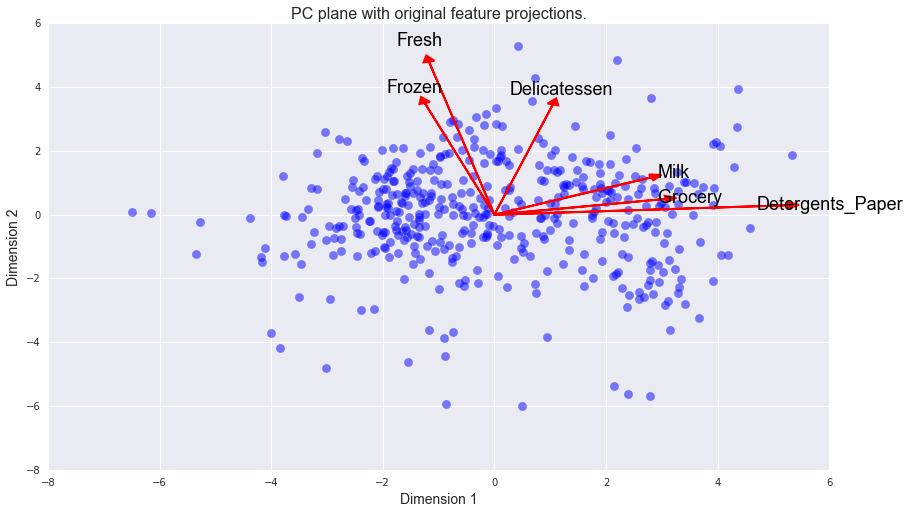

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**My answer (if needed - no heading was given.  Are these rhetorical questions)**
Yes, the observations agrees with the pca_results plot above.  The first component strongly agrees as the first paragraph states,  The first principal components in Dimension 1 is `'Detergents_Paper'`.  `'Grocery'` and `'Milk'` and the next principal components.  Dimension 2 has `'Fresh'` as the principal component with `'Frozen'` and `'Delicatessen'` following.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

#### KMeans
Per sklearn website: *The KMeans algorithm clusters data by trying to separate samples in n-groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.*

It continues: *Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
* Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
* Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.*

However, there are some other drawbacks to using KMeans.  As the sklearn website states: *Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids.*

K-means is usually very fast, so one way to avoid this problem of getting stuck in local minimas is to run the algorithm multiple times with different starting conditions.

#### Gaussian Mixture Model (GMM)
Per sklearn website: *A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.
The GaussianMixture object implements the **expectation-maximization** (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data.*

The pros to the GMM are as follows:
* Speed - It is the fastest algorithm for learning mixture models (per sklearn)
* Agnostic - As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

And there are some cons:
* Singularity - When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
* Number of components - This algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.

##### Using GMM going forward
Given the information above, I plan to use the GM Model.  My first reasoning for doing so was because we have basically normalized our data in the log scale steps above.  This will give us a normal distribution for the analysis.

Another reason I am selecting the GMM over the KMeans is the fact that KMeans can get stuck in local minimas.  With that said, I have to be careful to make sure the GMM does not get stuck; because that is a drawback of GMM.  One of the cons of KMeans is it has a hard time with elongated clusters.  

These are all someone vague reasons for choosing the GMM over the KMeans.  The main reason I chose the GMM is the ability to "share" data points between features.  This will not eliminate a data point from particular feature (dimension), it will simply make it a probablity.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
n_components = 2
clusterer = GMM(n_components=n_components,covariance_type='full').fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
'''There is no "centers" function for GMM; therefore, I will use means_ instead'''
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print("Silhouette Coefficient for 2 components: %0.3f"% score)

Silhouette Coefficient for 2 components: 0.412


In [17]:
#Initialize two models
g2 = GMM(n_components=2)
g3 = GMM(n_components=3)

#Fit model to data
g2.fit(reduced_data)
g3.fit(reduced_data)

#BIC
print "2 clusters BIC: {bic}".format(bic=g2.bic(reduced_data))
print "3 clusters BIC: {bic}".format(bic=g3.bic(reduced_data))

#AIC
print "2 clusters AIC: {aic}".format(aic=g2.aic(reduced_data))
print "3 clusters AIC: {aic}".format(aic=g3.aic(reduced_data))

2 clusters BIC: 3576.49220036
3 clusters BIC: 3571.2481124
2 clusters AIC: 3539.81408608
3 clusters AIC: 3514.19326796


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhouette Coefficient for 2 components: **0.412**.  This is the highest value I received using 2-6 components.  The value approached 0 as I increased the number of components.  

* n_components = 2 -> **0.412**
* n_components = 3 -> **0.398**
* n_components = 4 -> **0.292**
* n_components = 5 -> **0.191**

This can be expected based on the following description of Silhouette Scores: Sklearn - *The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.*

This was analyzed against the Bayesian Information Criterion the Akaike information criterion for finding the optimal number of clusters given that the model is fitted using maximum likelihood.  The rule of thumb with BIC and AIC is that the model with the lowest BIC or AIC is preferred.  Based on this rule of thumb, it suggests I should use 3 clusters instead of 2.  However, the Silhouette Coefficient suggests using 2 clusters.  

Therefore, the final pick for clusters should be up to the distributor.  I will assume he chose 2 for my analysis because it is simplier (less is more). 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

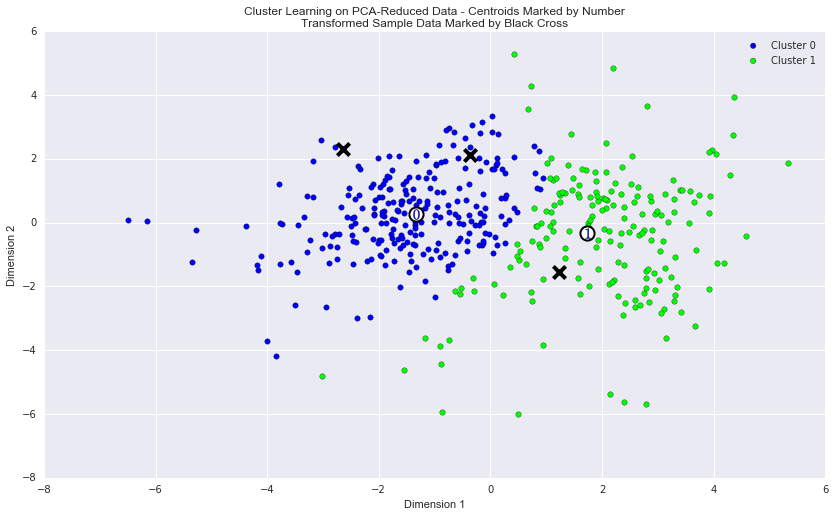

In [18]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9606.0,2068.0,2675.0,2195.0,331.0,752.0
Segment 1,3812.0,6414.0,9838.0,942.0,3242.0,886.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

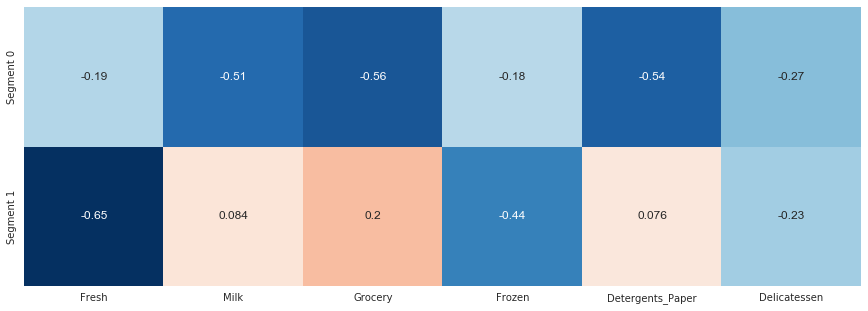

In [20]:
# Below is a heatmap to visualize the normalized cluster expenditures.
sns.heatmap((true_centers-data.mean())/data.std(ddof=0),square=True, annot=True, cbar=False)

**Answer:**
Cluster 0 should best identify with the establishments represented by the feature set of Segment 0.  My reasons are stated in Question 1 and I would assume this Segment is representative of a *restaurant/hotel/b&b* type facility.  I chose this establishment type because: 
* The *Detergents_Paper* is higher than the mean value which means that cleaning is needed.  This is indicative of a place where people stay for long periods of time and would like it to be clean.  
* The *Grocery* and *Milk* is above the mean value as well, which make sense for a continental breakfast situation. 

Cluster 1 should best identify with the establishments represented by the feature set of Segment 1.  I took this type of customer as a representative of a *sandwich / market* type of facility.  Amazingly enough, Segment 1 is below the mean for all features.  However, compared to Segment 0, we can notice a few things.
* The *Detergents_Paper* is significantly less.  Meaning, people will not be in the location for long periods of time.  
* *Frozen* is significantly larger.  I take this to mean it is more of a market store where people come to buy food instead of sitting down to eat.  It could also represent a "Fast Food" chain which has all of its food sent from the franchise hub.
* *Fresh* is also much larger than Segment 0.  This again implies quick turnover, so it matches the overall trend of a market.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

* Sample point 0 - I agree with the prediction.  I think the results are consistant with my sample from Q1.  This can be seen by that the costs of *Detergents_Paper* and *Grocery* line up.
* Sample points 1 & 2 - I agree with predictions and think the results are consistant with samples. They both appear to have much larger *Frozen* food costs as well as the *Fresh* is higher than sample point 0.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Wiki: 
* A/B testing is a way to compare two versions of a single variable typically by testing a subject's response to variable A against variable B, and determining which of the two variables is more effective.
* As the name implies, two versions (A and B) are compared, which are identical except for one variation that might affect a user's behavior. Version A might be the currently used version (control), while version B is modified in some respect (treatment). 

This analysis seem perfect for our customer set.  We are looking to change one variable: change delivery time from 5 days a week to 3.  We have already done unsupervised learning to determine that our customers can be split or clustered into two groups.  We should not compare the change in delivery service between the two groups because we have already determined they are different.  However, if we split Segment 0 and 1 into two groups: *control* and *treatment*, then we could get some information that could be used as a valid source of feedback.

From the data we have received so far, I would think the change in deliver schedule would have more of a negative effect on Segment 1 than Segment 0.  This is because Segment 1 group spends the most money on *Fresh* food.  From a personally standpoint, I prefer fresh food that is *fresh* and not 1 or 2 days old (depending if they are opening 7 days a week).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
* We have already done something very similar in **Question 9** of the analysis for our sample clients.  We took the sample clients and used the 'clusterer.predict' function to predict which cluster our sample clients should be in.  As discussed above the results seemed reasonable.

* We also have a new engineered feature which we calculated above to give us a 7th feature to the datasets.  We could use the unsupervised learner with now 7 features and produce clusters.  These new clusters could be used to help predict which cluster our new 10 clients will be placed.  

This could be exactly the same results (as described in the first bullet), but I would expect different results.  More imformation leads to better predictors.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

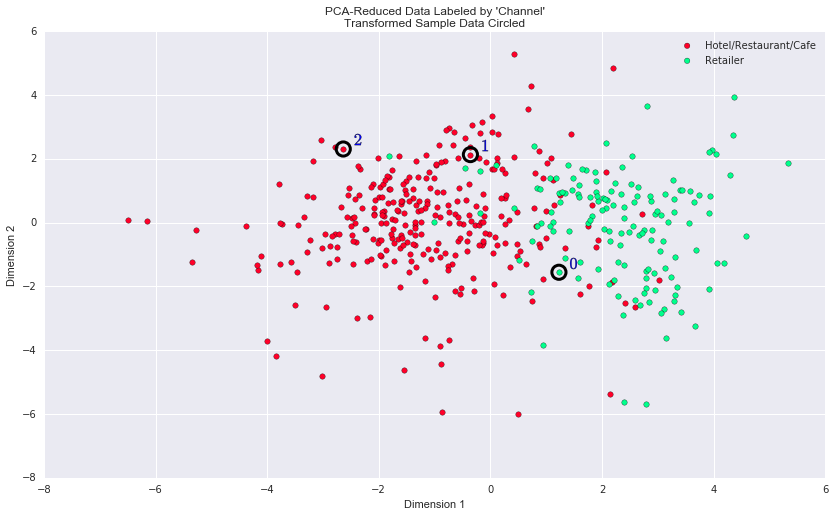

In [22]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The distribution and clustering algorithm are comparable with some small differences.  We do have the same number of clusters.  As seen in the distribution above, there are red data points surrounded by green and vice versa.  In the clustering I did, there was a distinct line (spline or curve) that could be drawn to separate the data.  Overall though, I think the two compare quite well.

In the distribution above I would consider a few of the points as purely *'Hotel/Restaurants/Cafes'*.  I don't think *'Retailers'* has a purely classification.  For *'Hotel/Restaurants/Cafes'*, I would chose the red points that are clustered together around 0 on Dimension 0 and -2 in Dimension 1.  These values are what I would consider the mean (or most likely) *'Hotel/Restaurants/Cafes'*.  However, *'Retailers'* are not as obvious.  Where I expect the mean, there is still some red data points in the neighborhood.   

Unfortunately, from an intuition standpoint, I do not think the classifications are consistent.  There is definitely some common trends and correlations to pull from the data (both have 2 clusters), but there are far to many data points that are different from the segment split I previous did.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.